## Bayesian Optimization：Hyperopt工具包

這裏為大家簡單介紹貝葉斯優化以及Hyperopt工具包的使用，附上部分參考資料：

[貝葉斯優化](https://sigopt.com/static/pdf/SigOpt_Bayesian_Optimization_Primer.pdf) [Hyperopt](https://jaberg.github.io/hyperopt/) 

### 貝葉斯優化所需四大部分：

-  1. Objective 目標函數
-  2. Domain space: 指定參數空間
-  3. Hyperparameter optimization function: 可以選擇的採樣算法，隨機或者貝葉斯優化
-  4. Trials: 記錄結果的保存

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from hyperopt import hp
from hyperopt.pyll.stochastic import sample
from hyperopt import rand , tpe
from hyperopt import Trials
from hyperopt import STATUS_OK

### Objective
自定義一下我們的目標函式，而目標函式要有一個最小值

In [2]:
def objective(x):
    
    # 建造多項式函數
    f = np.poly1d([1 , -2 , -28 , 28, 12 , -26 , 100])

    return f(x)

# def objective(args) : # 2個變數
#     x , y = args
#     return (x - 1) ** 2 + y ** 2

Minimum of -4396.023925315161 occurs at 4.877887788778878


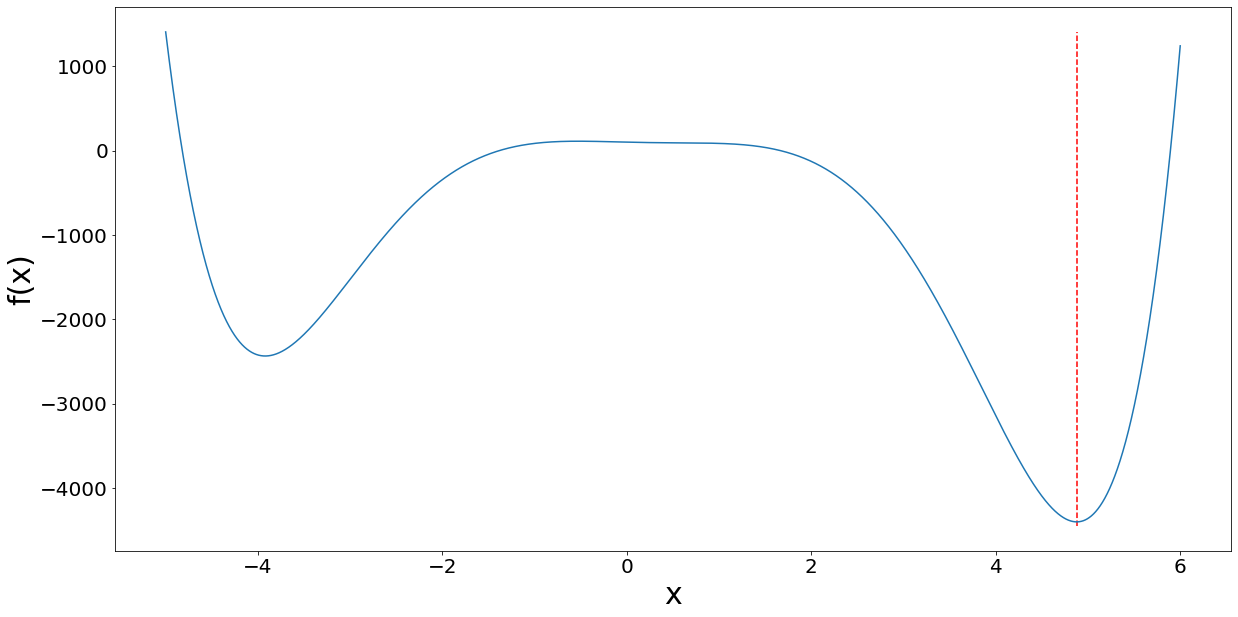

In [3]:
x = np.linspace(-5 , 6 , 10000)
y = objective(x)
minx = x[np.argmin(y)]

# 看一下目標函數長什麼樣子
fig , ax = plt.subplots(1 , 1 , figsize = (20 , 10))
ax.plot(x , y)
ax.vlines(minx , min(y) - 50 , max(y) , linestyles = '--' , colors = 'r')
ax.set_xlabel('x' , fontsize = 30)
ax.set_ylabel('f(x)' , fontsize = 30)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
print('Minimum of {} occurs at {}'.format(min(y) , minx))

# Domain
參數的取值範圍

In [4]:
# 創造 domain space
space = hp.uniform('x' , -5 , 6)

# space = [hp.uniform('x' , -10 , 10) , hp.uniform('y' , -10 , 10)]

We can draw samples from the space using a Hyperopt utility. This is useful for visualizing a distribution.

Text(0.5, 1.0, 'Domain Space')

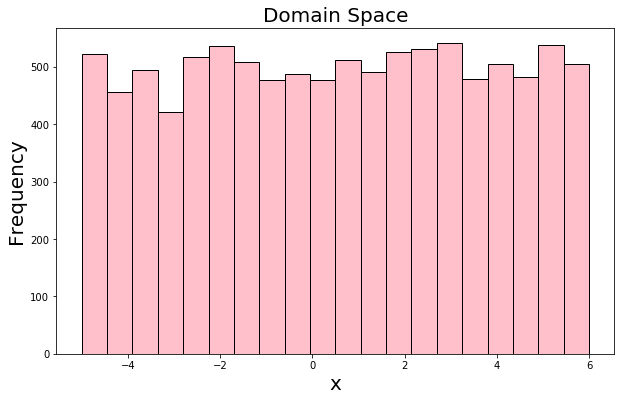

In [5]:
# 採樣10000個點 
samples = []
for _ in range(0 , 10000):
    samples.append(sample(space))
    
# 看一下如何取樣
fig , ax = plt.subplots(1 , 1 , figsize = (10 , 6))
ax.hist(samples , bins = 20 , color = 'pink' , edgecolor = 'black')
ax.set_xlabel('x' , fontsize = 20)
ax.set_ylabel('Frequency' , fontsize = 20)
ax.set_title('Domain Space' , fontsize = 20)

### Hyperparameter Optimization Algorithm
随机或者贝叶斯优化

In [6]:
# 決定要用哪種algorithms去計算
rand_algo = rand.suggest # 隨機優化
tpe_algo = tpe.suggest   # 貝葉斯優化

### Trials

儲存每次迭代的結果

In [7]:
tpe_trials = Trials()
rand_trials = Trials()

In [8]:
from hyperopt import fmin

# 用tpe algorithm迭代2000次
tpe_best = fmin(fn = objective , 
                space = space ,
                algo = tpe_algo , 
                trials = tpe_trials , 
                max_evals = 2000 , 
                rstate = np.random.RandomState(50))
print(tpe_best)

# 用rand algorithm迭代2000次
rand_best = fmin(fn = objective ,
                 space = space ,
                 algo = rand_algo , 
                 trials = rand_trials , 
                 max_evals = 2000 ,
                 rstate = np.random.RandomState(50))
print(rand_best)

100%|██████████████████████████████████████████████| 2000/2000 [00:19<00:00, 100.48it/s, best loss: -4396.023762243823]
{'x': 4.878481851906148}
100%|██████████████████████████████████████████████| 2000/2000 [00:03<00:00, 542.05it/s, best loss: -4396.023381529373]
{'x': 4.877613189834774}


### 貝葉斯優化結果展示

In [9]:
# 將結果存入dataframe
tpe_results = pd.DataFrame({'loss' : [x['loss'] for x in tpe_trials.results] , 
                            'iteration' : tpe_trials.idxs_vals[0]['x'] ,
                            'x' : tpe_trials.idxs_vals[1]['x']})
                            
tpe_results.head()

,loss,iteration,x
0,724.201464,0,5.957885
1,-4047.681038,1,4.470885
2,-1510.388973,2,3.218963
3,110.871037,3,-0.515859
4,701.560212,4,-4.916832


Text(0, 0.5, 'Count')

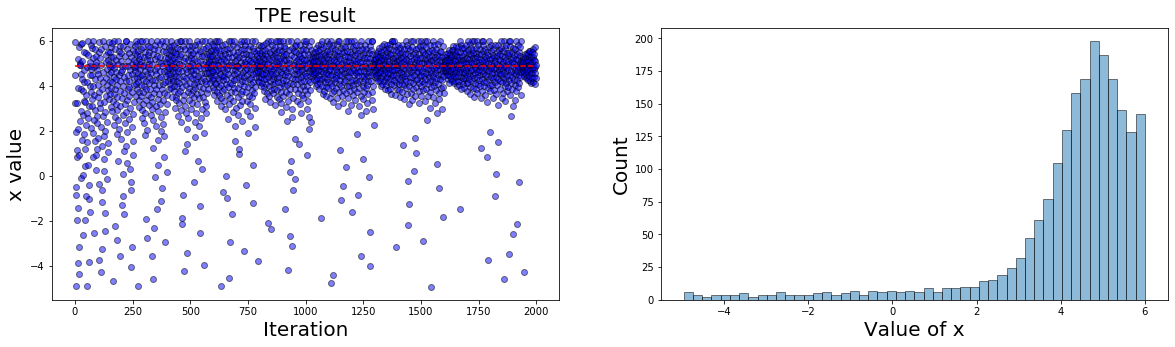

In [11]:
# 迭代過程趨勢
fig , ax = plt.subplots(1 , 2 , figsize = (20 , 5))
ax[0].scatter(tpe_results['iteration'] , tpe_results['x'] , alpha = 0.5 , color = 'blue' , edgecolor = 'black')
ax[0].set_xlabel('Iteration' , fontsize = 20)
ax[0].set_ylabel('x value' , fontsize = 20)
ax[0].set_title('TPE result' , size = 20)
ax[0].hlines(minx , 0 , 2000 , linestyles = '--' , colors = 'r')

# 看看不同的驗算法選了那些x
ax[1].hist(tpe_results['x'] , bins = 50 , alpha = 0.5 , edgecolor = 'black')
ax[1].set_xlabel('Value of x' , fontsize = 20)
ax[1].set_ylabel('Count' , fontsize = 20)

### 隨機優化结果展示

In [12]:
rand_results = pd.DataFrame({'loss' : [x['loss'] for x in rand_trials.results] , 
                             'iteration' : rand_trials.idxs_vals[0]['x'] ,
                             'x' : rand_trials.idxs_vals[1]['x']})
                            
rand_results.head()

,loss,iteration,x
0,724.201464,0,5.957885
1,-4047.681038,1,4.470885
2,-1510.388973,2,3.218963
3,110.871037,3,-0.515859
4,701.560212,4,-4.916832


Text(0, 0.5, 'Count')

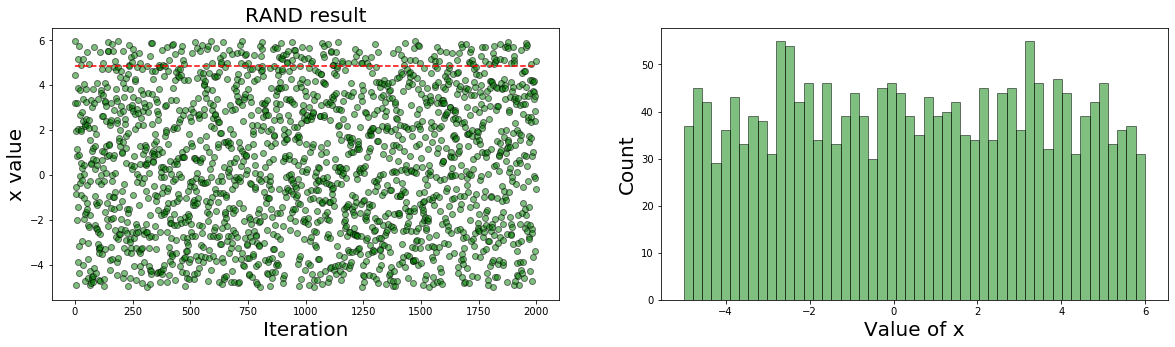

In [13]:
# 迭代過程趨勢
fig , ax = plt.subplots(1 , 2 , figsize = (20 , 5))
ax[0].scatter(rand_results['iteration'] , rand_results['x'] , alpha = 0.5 , color = 'green' , edgecolor = 'black')
ax[0].set_xlabel('Iteration' , fontsize = 20)
ax[0].set_ylabel('x value' , fontsize = 20)
ax[0].set_title('RAND result' , size = 20)
ax[0].hlines(minx , 0 , 2000 , linestyles = '--' , colors = 'r')

# 看看不同的驗算法選了那些x
ax[1].hist(rand_results['x'] , bins = 50 , color = 'green' , alpha = 0.5 , edgecolor = 'black')
ax[1].set_xlabel('Value of x' , fontsize = 20)
ax[1].set_ylabel('Count' , fontsize = 20)

貝葉斯優化在每個迭代的過程，選值值會越來越收斂<br>
隨機優化在每次迭代都是隨機的選值

### 選擇更合適的參數空間
這會使得我們做起優化來更快更有效率

In [14]:
# 創造另一個 domain space
space = hp.normal('x' , 4.9 , 0.5)

Text(0.5, 1.0, 'Domain Space')

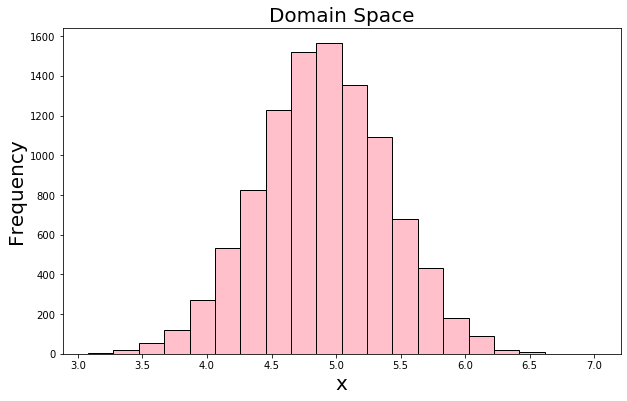

In [15]:
samples = []

# 採樣10000個點 
for _ in range(10000):
    samples.append(sample(space))
    
# 看一下如何取樣
fig , ax = plt.subplots(1 , 1 , figsize = (10 , 6))
ax.hist(samples , bins = 20 , color = 'pink' , edgecolor = 'black')
ax.set_xlabel('x' , fontsize = 20)
ax.set_ylabel('Frequency' , fontsize = 20)
ax.set_title('Domain Space' , fontsize = 20)

In [16]:
def objective(x):
    
    f = np.poly1d([1 , -2 , -28 , 28 , 12 , -26 , 100])

    loss = f(x)

    results = {'loss' : loss , 
               'status' : STATUS_OK ,
               'x' : x}
    
    return results

In [17]:
trials = Trials()

# 用新的 dmain space 與 tpe algorithm 迭代2000次
best = fmin(fn = objective ,
            space = space , 
            algo = tpe_algo , 
            trials = trials, 
            max_evals = 2000 ,
            rstate = np.random.RandomState(50))

100%|██████████████████████████████████████████████| 2000/2000 [00:17<00:00, 116.35it/s, best loss: -4396.024080052093]


In [18]:
results = trials.results
for i in range(0 , 5):
    print('\n')
    print(results[i])



{'loss': -2780.2051692506748, 'status': 'ok', 'x': 5.54651623934235}


{'loss': -4388.794137485668, 'status': 'ok', 'x': 4.8246327940590765}


{'loss': -4342.379128014889, 'status': 'ok', 'x': 5.016897215561406}


{'loss': -4188.68270139017, 'status': 'ok', 'x': 4.572223249583556}


{'loss': -3554.6304466390543, 'status': 'ok', 'x': 4.1970360148370895}


In [19]:
# 將結果存入dataframe
tpe_resuts_new = pd.DataFrame({'loss' : [x['loss'] for x in results] ,
                               'x' : [x['x'] for x in results] ,
                               'iteration': trials.idxs_vals[0]['x']})
tpe_resuts_new.head()

,loss,x,iteration
0,-2780.205169,5.546516,0
1,-4388.794137,4.824633,1
2,-4342.379128,5.016897,2
3,-4188.682701,4.572223,3
4,-3554.630447,4.197036,4


Text(0, 0.5, 'Count')

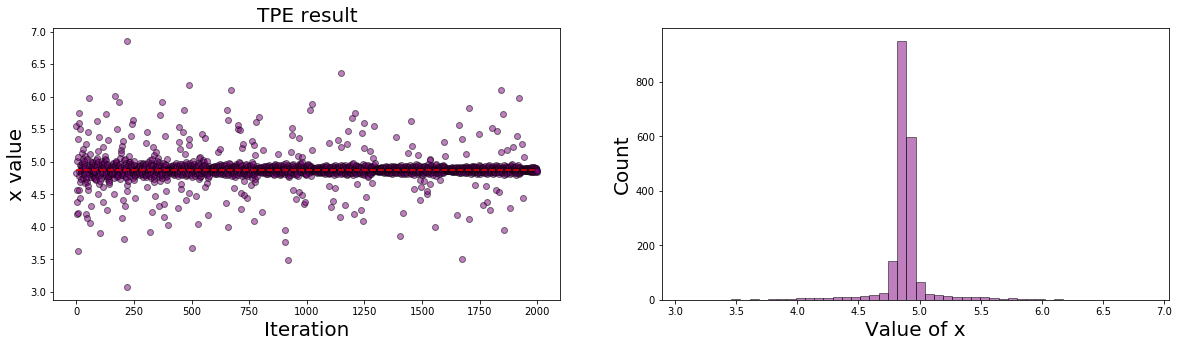

In [20]:
# 迭代過程趨勢
fig , ax = plt.subplots(1 , 2 , figsize = (20 , 5))
ax[0].scatter(tpe_resuts_new['iteration'] , tpe_resuts_new['x'] , alpha = 0.5 , color = 'purple' , edgecolor = 'black')
ax[0].set_xlabel('Iteration' , fontsize = 20)
ax[0].set_ylabel('x value' , fontsize = 20)
ax[0].set_title('TPE result' , size = 20)
ax[0].hlines(minx , 0 , 2000 , linestyles = '--' , colors = 'r')

# 看看選了那些x
ax[1].hist(tpe_resuts_new['x'] , bins = 50 , alpha = 0.5 , color = 'purple' , edgecolor = 'black')
ax[1].set_xlabel('Value of x' , fontsize = 20)
ax[1].set_ylabel('Count' , fontsize = 20)

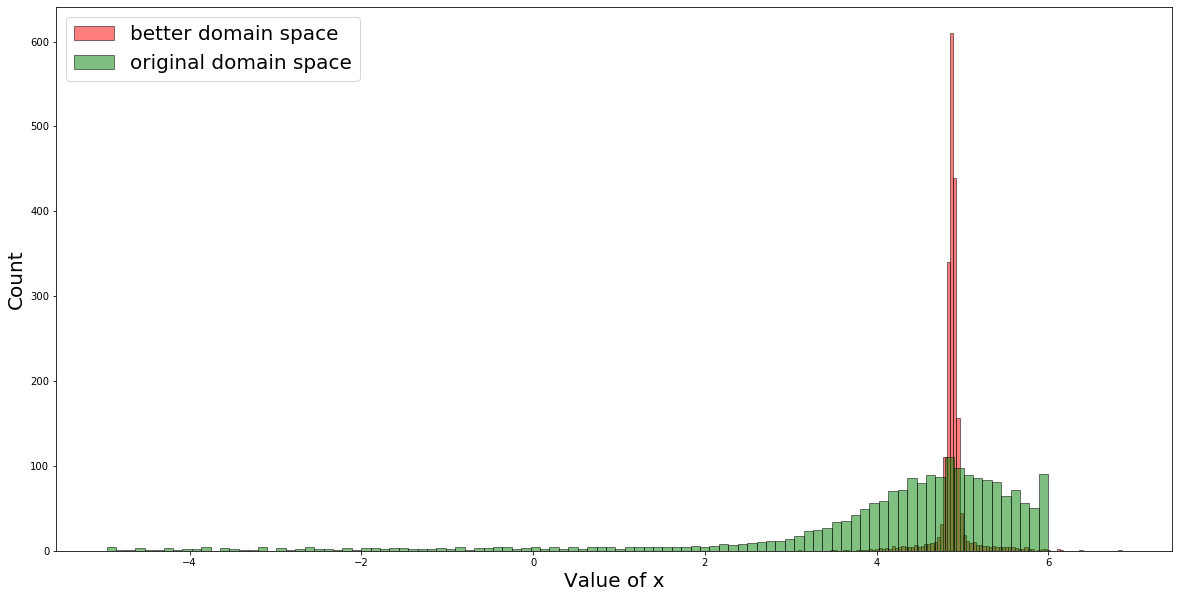

In [21]:
fig , ax = plt.subplots(1 , 1 , figsize = (20 , 10))
ax.hist(tpe_resuts_new['x'] , bins = 100 , alpha = 0.5 , color = 'red' , edgecolor = 'black' , label = 'better domain space')
ax.hist(tpe_results['x'] , bins = 100 , alpha = 0.5 , color = 'green' , edgecolor = 'black' , label = 'original domain space')
ax.set_xlabel('Value of x' , fontsize = 20)
ax.set_ylabel('Count' , fontsize = 20)
ax.legend(loc = 'upper left' , fontsize = 20)

選擇較好的參數空間，取值的結果會比較好